In [1]:
from horton import *
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('/home/giorgiod/Documents/horton_test/Alchemy CO-N2/Nitrogen')

In [5]:
from optimiz import optimiz
from nn_scf import b3lyp
Mu_NN=periodic['n'].mass/2.
def to_cm(k,Mu=Mu_NN):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

def taylor4(dx,f,d1,d2,d3,d4):
    return f+dx*d1+0.5*d2*dx**2+d3*dx**3/6.+d4*dx**4/24.

In [31]:
%store -r

In [6]:
def FivePointDerivatives(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (5):
        points.append(b3lyp(x+h*(i-2)))
    fd4=(points[4]-points[3]*4+points[2]*6-points[1]*4+points[0])/h**4
    fd3=(points[4]-2*points[3]+2*points[1]-points[0])/(2*h**3)
    fd1=(points[3]-points[1]-h**3*fd3/3.)/2/h
    fd2=(points[3]-2*points[2]+points[1]-h**4/12.*fd4)/(h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3, fd4, 'to cm:' ,to_cm(fd2)
    return (x,points[2],fd1,fd2,fd3,fd4)

To obtain the point of minium we have to predict were the derivative is minimum, in particular we have to solve:
$ \frac{1}{6}f^{(4)}dx^3 +\frac{1}{2}f^{(3)}dx^2+ f'' dx+f'=0 $
which has the solution: $dx=-(b+C+\frac {\Delta _0}{C})\frac {1}{3a}$  where:
$\Delta _{0}=b^{2}-3ac$ , $\Delta _{1}=2b^{3}-9abc+27a^{2}d$ , 
$C={\sqrt[{3}]{\frac {\Delta _{1}\pm {\sqrt {{\Delta _{1}}^{2}-4{\Delta _{0}}^{3}}}}{2}}}$

In [7]:
def dx2f1(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3
    return (x+dx,to_cm(p2d))

def dx2f2(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3+dx**2*d4/2.
    return (x+dx,to_cm(p2d))

def dx3f1(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3
        return (x+dx,to_cm(p2d))
    else: return(1.,0.)
    
def dx3f2(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3+dx**2*d4/2.
        return (x+dx,to_cm(p2d))
    else: return(1.,0.)
    

def dx4f2(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
#    print 'D0=',D0
    D1=2*b**3-9*a*b*c+27*a**2*d
#    print 'D1= ', D1
#    print 'Delta=',(D1**2-4*D0**3)/(27*a**2)
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
#    print 'C =', C
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2
    return x+dx, to_cm(p2d)

def dx4f2C(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
#    print 'D0=',D0
    D1=2*b**3-9*a*b*c+27*a**2*d
#    print 'D1= ', D1
#    print 'Delta=',(D1**2-4*D0**3)/(27*a**2)
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
#    print 'C =', C
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2+d4**2/d3*dx**3/6.
#    print x+dx, to_cm(p2d)
    return x+dx, to_cm(p2d)

In [8]:
DerivativesH05=[]
for x in np.linspace(1.5,2.8,66):
    DerivativesH05.append(FivePointDerivatives(x,.05))

 _ __ _
/ (..) \ Welcome to HORTON 2.1.1!
\/ || \/
 |_''_|  HORTON is written and maintained by by Toon Verstraelen (1).

         This version contains contributions from Toon Verstraelen (1), Pawel Tecmer (2),
         Farnaz Heidar-Zadeh (2), Cristina E. González-Espinoza (2), Matthew Chan (2),
         Taewon D. Kim (2), Katharina Boguslawski (2), Stijn Fias (3),
         Steven Vandenbrande (1), Diego Berrocal (2), and Paul W. Ayers (2)

         (1) Center for Molecular Modeling (CMM), Ghent University, Ghent, Belgium.
         (2) The Ayers Group, McMaster University, Hamilton, Ontario, Canada.
         (3) General Chemistry (ALGC), Free University of Brussels, Brussels, Belgium.

         More information about HORTON can be found on this website:
         http://theochem.github.com/horton/

         The purpose of this log file is to track the progress and quality of a
         computation. Useful numerical output may be written to a checkpoint
         file and is accessible 

/home/giorgiod/.local/lib/python2.7/site-packages/horton/quadprog.py:621: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lagrange = np.linalg.lstsq(r_free.T, -g_free)[0]


   1  1.91419e+00                          3     -108.4247167944001
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.87738e+00                          4     -108.5092953830822
   2               1.000e+00    0.6196522  4 E                        -0.0511295
   3  3.18569e-01                          5     -108.6774163805741
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.51973e-01                          6     -108.6790659718706
   4               1.000e+00    0.6273397  6 E                        -0.0008995
   5  3.21834e-02                          6     -108.6819150209311
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.57911e-02                          6     -108.6819335116155
   6               1.000e+00    0.6309986  6 E                        -0.0000096
   7  3.43574e-03                          6     -108.6819642053314
   7               0.000e+00    1.0000

   4  2.43130e-01                          6     -109.0185695844970
   4               1.000e+00    0.6398189  6 E                        -0.0008314
   5  3.40489e-02                          6     -109.0213482715737
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.66734e-02                          6     -109.0213712378814
   6               1.000e+00    0.6436886  6 E                        -0.0000101
   7  3.87757e-03                          6     -109.0214054868807
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.00097e-03                          6     -109.0214057754390
   8               1.428e+11    0.6461191  6 M                                  
   9  4.21849e-04                          6     -109.0214062046149
   9               2.746e+13    1.0493078  6 M                                  
  10  1.93854e-04                          6     -109.0214062114964
  10               1.166e+13    0.7981

   7  4.22349e-03                          6     -109.2497649168201
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.21553e-03                          6     -109.2497652988376
   8               1.464e+11    0.6609210  6 M                                  
   9  4.60269e-04                          6     -109.2497658195727
   9               3.096e+13    1.0333113  6 M                                  
  10  1.89861e-04                          6     -109.2497658286533
  10               1.676e+13    0.8008338  6 M                                  
  11  1.67461e-06                          6     -109.2497658305118
  11               3.732e+15    1.0111627  6 M                                  
  12  9.36487e-09                          6     -109.2497658305121
  12               8.888e+16    1.0265646  6 C                                  
  13  3.88188e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   9  4.04492e-04                          6     -108.9329610027832
   9               2.739e+13    1.0547885  6 M                                  
  10  1.91191e-04                          6     -108.9329610089244
  10               1.087e+13    0.7993884  6 M                                  
  11  1.20270e-06                          6     -108.9329610106838
  11               2.520e+15    1.0058099  6 M                                  
  12  6.65193e-09                          6     -108.9329610106838
  12               4.905e+16    1.0245773  6 C                                  
  13  4.96259e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.940705372

  12  8.83034e-09                          6     -109.1908378368204
  12               7.801e+16    1.0273669  6 C                                  
  13  4.12708e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.899416036666
                                           hartree       82.317360129004
                                        grid_group      -11.462101168692
                                              x_hf       -2.724362453308
                                                ne     -320.431341463293
                                                nn       31.210191082803
                                             total     -109.190837836820
~~~~~

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7b650>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.25118e+01                          1      -93.5560924662350
   0  9.07823e+00                          2      -96.5127686213613
   0               1.000e+00    0.5649415  2 E                        -4.3087066
   1  1.80674e+00                          3     -108.7561931813424
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.72128e+00    

   0  1.20978e+01                          1      -94.4477852789010
   0  8.66490e+00                          2      -97.4973789820980
   0               1.000e+00    0.5711218  2 E                        -3.9434557
   1  1.72750e+00                          3     -109.0082021037727
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.59523e+00                          4     -109.0931526351606
   2               1.000e+00    0.6464413  4 E                        -0.0362573
   3  3.04698e-01                          5     -109.2263057378608
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.33555e-01                          6     -109.2281895805976
   4               1.000e+00    0.6499622  6 E                        -0.0007696
   5  3.50928e-02                          6     -109.2308808990152
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.70011e-02                     

   2  1.76864e+00                          4     -108.7431066896629
   2               1.000e+00    0.6296550  4 E                        -0.0448175
   3  3.15315e-01                          5     -108.8965021479298
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.46669e-01                          6     -108.8982391639874
   4               1.000e+00    0.6350050  6 E                        -0.0008570
   5  3.33656e-02                          6     -108.9010439983125
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.63659e-02                          6     -108.9010651683671
   6               1.000e+00    0.6387948  6 E                        -0.0000100
   7  3.70882e-03                          6     -108.9010980382862
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.89079e-03                          6     -108.9010982904780
   8               1.511e+11    0.6397

   5  3.48006e-02                          6     -109.1694314869438
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.69314e-02                          6     -109.1694569596550
   6               1.000e+00    0.6506415  6 E                        -0.0000103
   7  4.09532e-03                          6     -109.1694928995663
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.13780e-03                          6     -109.1694932435638
   8               1.420e+11    0.6554039  6 M                                  
   9  4.47645e-04                          6     -109.1694937281626
   9               2.904e+13    1.0394474  6 M                                  
  10  1.93023e-04                          6     -109.1694937364068
  10               1.428e+13    0.7990103  6 M                                  
  11  1.54317e-06                          6     -109.1694937382854
  11               3.140e+15    1.0087

   8  3.31983e-03                          6     -109.3470840850158
   8               1.562e+11    0.6678730  6 M                                  
   9  4.75555e-04                          6     -109.3470846605470
   9               3.468e+13    1.0244513  6 M                                  
  10  1.83868e-04                          6     -109.3470846708337
  10               2.146e+13    0.8038219  6 M                                  
  11  1.76675e-06                          6     -109.3470846726398
  11               5.100e+15    1.0144838  6 M                                  
  12  9.83307e-09                          6     -109.3470846726404
  12               8.954e+16    1.0224502  6 C                                  
  13  1.57861e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.94312e-04                          6     -109.0999353228606
  10               1.281e+13    0.7981488  6 M                                  
  11  1.43725e-06                          6     -109.0999353247340
  11               2.844e+15    1.0072782  6 M                                  
  12  8.04645e-09                          6     -109.0999353247339
  12               6.560e+16    1.0277228  6 C                                  
  13  5.02259e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.291878044715
                                           hartree       83.041005538207
                                        grid_group      -11.503772822110

  13  3.27295e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.366048918133
                                           hartree       81.279710123967
                                        grid_group      -11.403281796655
                                              x_hf       -2.709163211606
                                                ne     -317.896283921134
                                                nn       30.061349693252
                                             total     -109.301620194043
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb76b50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22694e+01                          1      -94.1143288424879
   0  8.82627e+00                          2      -97.1200797110092
   0               1.000e+00    0.5684488  2 E                        -4.0890423
   1  1.75414e+00                          3     -108.9197924342091
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.64021e+00    

   0  1.18284e+01                          1      -94.8965300859882
   0  8.43157e+00                          2      -98.0256532954698
   0               1.000e+00    0.5756059  2 E                        -3.7271364
   1  1.69684e+00                          3     -109.1150119511416
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.53800e+00                          4     -109.2003369806852
   2               1.000e+00    0.6522639  4 E                        -0.0338804
   3  2.98718e-01                          5     -109.3279561412685
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.27201e-01                          6     -109.3298942882940
   4               1.000e+00    0.6562334  6 E                        -0.0007330
   5  3.55954e-02                          6     -109.3325325597802
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.70907e-02                     

   2  1.67852e+00                          4     -108.9278501924280
   2               1.000e+00    0.6383477  4 E                        -0.0401067
   3  3.11375e-01                          5     -109.0701639607906
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.41139e-01                          6     -109.0719796310930
   4               1.000e+00    0.6421520  6 E                        -0.0008178
   5  3.43321e-02                          6     -109.0747411309671
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.67833e-02                          6     -109.0747649559054
   6               1.000e+00    0.6460554  6 E                        -0.0000102
   7  3.95454e-03                          6     -109.0747998132113
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.05008e-03                          6     -109.0748001201394
   8               1.412e+11    0.6492

   5  3.53571e-02                          6     -109.2850113036094
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.70537e-02                          6     -109.2850391865732
   6               1.000e+00    0.6571755  6 E                        -0.0000104
   7  4.28432e-03                          6     -109.2850766025572
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.25183e-03                          6     -109.2850770041242
   8               1.491e+11    0.6634026  6 M                                  
   9  4.65818e-04                          6     -109.2850775430328
   9               3.207e+13    1.0302887  6 M                                  
  10  1.87997e-04                          6     -109.2850775525220
  10               1.817e+13    0.8018346  6 M                                  
  11  1.73730e-06                          6     -109.2850775543659
  11               4.103e+15    1.0122

   8  3.41410e-03                          6     -109.4212092391574
   8               1.680e+11    0.6733600  6 M                                  
   9  4.88421e-04                          6     -109.4212098713419
   9               3.888e+13    1.0160865  6 M                                  
  10  1.77789e-04                          6     -109.4212098828234
  10               2.717e+13    0.8063724  6 M                                  
  11  1.73449e-06                          6     -109.4212098845759
  11               7.059e+15    1.0157554  6 M                                  
  12  9.60464e-09                          6     -109.4212098845759
  12               1.253e+17    1.0154829  6 C                                  
  13  8.72241e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.90713e-04                          6     -109.2309451527634
  10               1.610e+13    0.8003663  6 M                                  
  11  1.64238e-06                          6     -109.2309451546282
  11               3.566e+15    1.0105481  6 M                                  
  12  9.18986e-09                          6     -109.2309451546284
  12               8.496e+16    1.0267431  6 C                                  
  13  3.86656e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.714493976890
                                           hartree       81.965197959791
                                        grid_group      -11.442006351788

  13  4.56039e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.893130613807
                                           hartree       80.297036000972
                                        grid_group      -11.348743919159
                                              x_hf       -2.694849213236
                                                ne     -315.527423886682
                                                nn       28.994082840237
                                             total     -109.386767564062
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7bb50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.20094e+01                          1      -94.6039269153265
   0  8.58603e+00                          2      -97.6784173214240
   0               1.000e+00    0.5725578  2 E                        -3.8709181
   1  1.71605e+00                          3     -109.0470218615592
   1               0.000e+00    1.0000000  3 E                  

   0  1.15490e+01                          1      -95.2901382038921
   0  8.20745e+00                          2      -98.5090742139877
   0               1.000e+00    0.5805196  2 E                        -3.5172544
   1  1.67469e+00                          3     -109.1959796347454
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.49047e+00                          4     -109.2820089470171
   2               1.000e+00    0.6574155  4 E                        -0.0320704
   3  2.93055e-01                          5     -109.4056136945149
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.21355e-01                          6     -109.4076089193216
   4               1.000e+00    0.6621260  6 E                        -0.0007025
   5  3.60284e-02                          6     -109.4102080758022
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.71461e-02                     

   2  1.60594e+00                          4     -109.0724089367762
   2               1.000e+00    0.6453826  4 E                        -0.0367264
   3  3.05694e-01                          5     -109.2066724992508
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.34643e-01                          6     -109.2085471861144
   4               1.000e+00    0.6488796  6 E                        -0.0007762
   5  3.49984e-02                          6     -109.2112483184085
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.69797e-02                          6     -109.2112745931919
   6               1.000e+00    0.6528644  6 E                        -0.0000104
   7  4.16043e-03                          6     -109.2113110303338
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.17749e-03                          6     -109.2113113931455
   8               1.439e+11    0.6582

   5  3.58169e-02                          6     -109.3740774287555
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.71198e-02                          6     -109.3741077439658
   6               1.000e+00    0.6633126  6 E                        -0.0000105
   7  4.45556e-03                          6     -109.3741466110693
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.35205e-03                          6     -109.3741470735521
   8               1.599e+11    0.6698511  6 M                                  
   9  4.79977e-04                          6     -109.3741476676731
   9               3.605e+13    1.0216049  6 M                                  
  10  1.81765e-04                          6     -109.3741476783544
  10               2.326e+13    0.8047366  6 M                                  
  11  1.75565e-06                          6     -109.3741476801411
  11               5.659e+15    1.0151

   8  3.50719e-03                          6     -109.4762774105374
   8               1.809e+11    0.6775566  6 M                                  
   9  5.02622e-04                          6     -109.4762781042161
   9               4.233e+13    1.0083608  6 M                                  
  10  1.73820e-04                          6     -109.4762781170377
  10               3.314e+13    0.8081927  6 M                                  
  11  1.72548e-06                          6     -109.4762781187785
  11               9.043e+15    1.0135703  6 M                                  
  12  9.54547e-09                          6     -109.4762781187785
  12               1.076e+17    1.0048979  6 C                                  
  13  1.73904e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.84925e-04                          6     -109.3326007963456
  10               2.056e+13    0.8033434  6 M                                  
  11  1.77211e-06                          6     -109.3326007981616
  11               4.807e+15    1.0139592  6 M                                  
  12  9.87136e-09                          6     -109.3326007981616
  12               3.988e+16    1.0192888  6 C                                  
  13  3.63290e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.202026382252
                                           hartree       80.946182008195
                                        grid_group      -11.384639626210

  13  1.53887e-10                          6     -109.4508984038202
  13               4.882e+16    0.4067384  6 C                                  
  14  2.64292e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.474091659375
                                           hartree       79.366499832261
                                        grid_group      -11.298159947970
                                              x_hf       -2.681367647248
                                                ne     -313.311962300238
                                                nn       28.000000000000
                                             total     -109.450898403820
~~~~~

  13  3.65159e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.450563037823
                                           hartree       81.448758867797
                                        grid_group      -11.412781428089
                                              x_hf       -2.711633583571
                                                ne     -318.306898028573
                                                nn       30.246913580247
                                             total     -109.285077554366
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb76c50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12643e+01                          1      -95.6348151936688
   0  7.99153e+00                          2      -98.9599556806220
   0               1.000e+00    0.5860753  2 E                        -3.3093601
   1  1.66172e+00                          3     -109.2551031873837
   1               0.000e+00    1.0000000  3 E                  

   0  1.18741e+01                          1      -94.8257531074477
   0  8.46979e+00                          2      -97.9407025007707
   0               1.000e+00    0.5748238  2 E                        -3.7628671
   1  1.70123e+00                          3     -109.0991517105436
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.54676e+00                          4     -109.1843916865747
   2               1.000e+00    0.6513511  4 E                        -0.0342298
   3  2.99707e-01                          5     -109.3128104850038
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.28234e-01                          6     -109.3147395644224
   4               1.000e+00    0.6552145  6 E                        -0.0007387
   5  3.55182e-02                          6     -109.3173858970055
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.70796e-02                     

   3  2.90674e-01                          5     -109.4368081808282
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.18863e-01                          6     -109.4388375159124
   4               1.000e+00    0.6649274  6 E                        -0.0006907
   5  3.62610e-02                          6     -109.4414276450181
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.71933e-02                          6     -109.4414605415994
   6               1.000e+00    0.6690554  6 E                        -0.0000107
   7  4.61893e-03                          6     -109.4415010071843
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.44636e-03                          6     -109.4415015356262
   8               1.724e+11    0.6748586  6 M                                  
   9  4.93480e-04                          6     -109.4415021881607
   9               4.017e+13    1.0134

   4  2.11470e-01                          6     -109.5130509392796
   4               1.000e+00    0.6735624  6 E                        -0.0006607
   5  3.69560e-02                          6     -109.5156346060332
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73246e-02                          6     -109.5156721153109
   6               1.000e+00    0.6777286  6 E                        -0.0000110
   7  4.87151e-03                          6     -109.5157155477669
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.58981e-03                          6     -109.5157161966031
   8               1.930e+11    0.6809885  6 M                                  
   9  5.14190e-04                          6     -109.5157169530718
   9               4.380e+13    1.0010515  6 M                                  
  10  1.69491e-04                          6     -109.5157169672046
  10               3.825e+13    0.8096

   6  2.71461e-02                          6     -109.4102396406522
   6               1.000e+00    0.6662337  6 E                        -0.0000106
   7  4.53664e-03                          6     -109.4102792605797
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.39873e-03                          6     -109.4102797550652
   8               1.659e+11    0.6725401  6 M                                  
   9  4.86295e-04                          6     -109.4102803775709
   9               3.819e+13    1.0174406  6 M                                  
  10  1.78715e-04                          6     -109.4102803888483
  10               2.618e+13    0.8059923  6 M                                  
  11  1.73911e-06                          6     -109.4102803906080
  11               6.714e+15    1.0157884  6 M                                  
  12  9.63702e-09                          6     -109.4102803906085
  12               7.723e+16    1.0161

   9  5.08471e-04                          6     -109.4977587716516
   9               4.343e+13    1.0046820  6 M                                  
  10  1.71547e-04                          6     -109.4977587851215
  10               3.593e+13    0.8090179  6 M                                  
  11  1.71513e-06                          6     -109.4977587868510
  11               9.344e+15    1.0112116  6 M                                  
  12  9.47469e-09                          6     -109.4977587868509
  12               3.638e+15    0.8682790  6 C                                  
  13  1.54784e-10                          6     -109.4977587868512
  13               5.109e+16    0.3949436  6 C                                  
  14  1.98514e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

   9  4.79977e-04                          6     -109.3741476676731
   9               3.605e+13    1.0216049  6 M                                  
  10  1.81765e-04                          6     -109.3741476783544
  10               2.326e+13    0.8047366  6 M                                  
  11  1.75565e-06                          6     -109.3741476801411
  11               5.659e+15    1.0151988  6 M                                  
  12  9.75398e-09                          6     -109.3741476801414
  12               1.228e+16    0.9975137  6 C                                  
  13  7.87826e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.968037757

  12  9.54547e-09                          6     -109.4762781187785
  12               1.076e+17    1.0048979  6 C                                  
  13  1.73904e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.282920494364
                                           hartree       78.919889922068
                                        grid_group      -11.274233101360
                                              x_hf       -2.674922414783
                                                ne     -312.258022906708
                                                nn       27.528089887640
                                             total     -109.476278118779
~~~~~

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7bf90>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15961e+01                          1      -95.2280891085220
   0  8.24420e+00                          2      -98.4314480618786
   0               1.000e+00    0.5796727  2 E                        -3.5517380
   1  1.67790e+00                          3     -109.1840741183589
   1               0.000e+00    1.0000000  3 E                  

   0  1.11216e+01                          1      -95.7904898617439
   0  7.88700e+00                          2      -99.1704852089109
   0               1.000e+00    0.5889714  2 E                        -3.2090760
   1  1.65773e+00                          3     -109.2778954697740
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.43651e+00                          4     -109.3659860786746
   2               1.000e+00    0.6642064  4 E                        -0.0302450
   3  2.86228e-01                          5     -109.4862448917625
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.14272e-01                          6     -109.4883463971352
   4               1.000e+00    0.6702404  6 E                        -0.0006712
   5  3.66941e-02                          6     -109.4909286885348
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.72776e-02                     

   1  1.65890e+00                          3     -109.3263602139621
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.39688e+00                          4     -109.4179238160438
   2               1.000e+00    0.6703053  4 E                        -0.0292206
   3  2.80038e-01                          5     -109.5374877268211
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.07955e-01                          6     -109.5397260828173
   4               1.000e+00    0.6781992  6 E                        -0.0006504
   5  3.73675e-02                          6     -109.5423290522978
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.74251e-02                          6     -109.5423695527634
   6               1.000e+00    0.6823711  6 E                        -0.0000112
   7  5.01348e-03                          6     -109.5424149986142
   7               0.000e+00    1.0000

   2  1.45265e+00                          4     -109.3424368056659
   2               1.000e+00    0.6621052  4 E                        -0.0307551
   3  2.88480e-01                          5     -109.4635421843671
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.16565e-01                          6     -109.4656080858229
   4               1.000e+00    0.6676318  6 E                        -0.0006807
   5  3.64929e-02                          6     -109.4681940917284
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.72447e-02                          6     -109.4682283650880
   6               1.000e+00    0.6717768  6 E                        -0.0000107
   7  4.69963e-03                          6     -109.4682697211756
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.49288e-03                          6     -109.4682702849505
   8               1.788e+11    0.6769

   5  3.71571e-02                          6     -109.5304126963905
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73690e-02                          6     -109.5304516696406
   6               1.000e+00    0.6801039  6 E                        -0.0000111
   7  4.94273e-03                          6     -109.5304960742493
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.62991e-03                          6     -109.5304967616860
   8               1.988e+11    0.6825269  6 M                                  
   9  5.20139e-04                          6     -109.5304975509889
   9               4.319e+13    0.9973643  6 M                                  
  10  1.67841e-04                          6     -109.5304975658188
  10               3.974e+13    0.8099411  6 M                                  
  11  1.70257e-06                          6     -109.5304975675420
  11               9.562e+15    1.0050

   7  4.61894e-03                          6     -109.4415010071794
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.44637e-03                          6     -109.4415015356230
   8               1.722e+11    0.6748532  6 M                                  
   9  4.93482e-04                          6     -109.4415021881604
   9               4.014e+13    1.0134372  6 M                                  
  10  1.76532e-04                          6     -109.4415022000920
  10               2.914e+13    0.8069897  6 M                                  
  11  1.73293e-06                          6     -109.4415022018419
  11               7.627e+15    1.0153384  6 M                                  
  12  9.59528e-09                          6     -109.4415022018415
  12               5.582e+15    0.9432308  6 C                                  
  13  1.23800e-10                          6     -109.4415022018420
  13               4.896e+16    0.3904

   8  3.58981e-03                          6     -109.5157161966012
   8               1.930e+11    0.6809873  6 M                                  
   9  5.14192e-04                          6     -109.5157169530718
   9               4.379e+13    1.0010531  6 M                                  
  10  1.69492e-04                          6     -109.5157169672045
  10               3.824e+13    0.8096272  6 M                                  
  11  1.70658e-06                          6     -109.5157169689269
  11               9.866e+15    1.0085347  6 M                                  
  12  9.41470e-09                          6     -109.5157169689271
  12               1.131e+17    0.9916236  6 C                                  
  13  2.00091e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.65921e-04                          6     -109.5543535699515
  10               3.797e+13    0.8091274  6 M                                  
  11  1.71672e-06                          6     -109.5543535717174
  11               6.717e+15    0.9863631  6 M                                  
  12  9.48814e-09                          6     -109.5543535717179
  12               5.669e+15    0.9118939  6 C                                  
  13  1.65890e-10                          6     -109.5543535717174
  13               4.446e+16    0.3379806  6 C                                  
  14  2.66866e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.441145971

  11  1.71514e-06                          6     -109.4977587868506
  11               9.325e+15    1.0112370  6 M                                  
  12  9.47475e-09                          6     -109.4977587868511
  12               3.352e+15    0.8588717  6 C                                  
  13  1.58833e-10                          6     -109.4977587868514
  13               5.104e+16    0.3990163  6 C                                  
  14  2.00413e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.103105354628
                                           hartree       78.485249478225
                                        grid_group      -11.251166230757

  12  9.42042e-09                          6     -109.5458044225603
  12               6.481e+14    0.5169098  6 C                                  
  13  2.08247e-10                          6     -109.5458044225604
  13               4.808e+16    0.6017547  6 C                                  
  14  1.72946e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.578268327131
                                           hartree       77.118498439237
                                        grid_group      -11.180133746873
                                              x_hf       -2.649093466899
                                                ne     -308.067794236936
  

  12  9.54537e-09                          6     -109.4762781187785
  12               9.513e+16    1.0042169  6 C                                  
  13  2.11025e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.282920494364
                                           hartree       78.919889922068
                                        grid_group      -11.274233101360
                                              x_hf       -2.674922414783
                                                ne     -312.258022906708
                                                nn       27.528089887640
                                             total     -109.476278118779
~~~~~

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fac5090>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05154e+01                          1      -96.3531475303855
   0  7.45826e+00                          2      -99.9912610039052
   0               1.000e+00    0.6026742  2 E                        -2.7969109
   1  1.66354e+00                          3     -109.3338521943584
   1               0.000e+00    1.0000000  3 E                  

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb39690>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.11216e+01                          1      -95.7904898617439
   0  7.88700e+00                          2      -99.1704852089109
   0               1.000e+00    0.5889714  2 E                        -3.2090760
   1  1.65773e+00                          3     -109.2778954697740
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.43651e+00                          4     -109.3659860786746
   2 

   0  1.06522e+01                          1      -96.2381750507766
   0  7.55387e+00                          2      -99.8130240219907
   0               1.000e+00    0.5993155  2 E                        -2.8894530
   1  1.65890e+00                          3     -109.3263602139621
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.39688e+00                          4     -109.4179238160438
   2               1.000e+00    0.6703053  4 E                        -0.0292206
   3  2.80038e-01                          5     -109.5374877268211
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.07955e-01                          6     -109.5397260828173
   4               1.000e+00    0.6781992  6 E                        -0.0006504
   5  3.73675e-02                          6     -109.5423290522978
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.74251e-02                     

   1  1.88427e+00                          3     -109.2454417918003
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.63685e+00                          4     -109.3778676018671
   2               1.000e+00    0.6656473  4 E                        -0.0446857
   3  3.24954e-01                          5     -109.5579933914025
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.38363e-01                          6     -109.5612408210501
   4               1.000e+00    0.6845306  6 E                        -0.0008757
   5  4.42431e-02                          6     -109.5648663020871
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.21927e-02                          6     -109.5649286314983
   6               1.000e+00    0.6890169  6 E                        -0.0000159
   7  6.10609e-03                          6     -109.5649955820094
   7               0.000e+00    1.0000

   2  1.40634e+00                          4     -109.4062258318090
   2               1.000e+00    0.6686195  4 E                        -0.0294157
   3  2.81633e-01                          5     -109.5256287310579
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.09602e-01                          6     -109.5278221741291
   4               1.000e+00    0.6759338  6 E                        -0.0006547
   5  3.71571e-02                          6     -109.5304126963905
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73690e-02                          6     -109.5304516696406
   6               1.000e+00    0.6801039  6 E                        -0.0000111
   7  4.94273e-03                          6     -109.5304960742493
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.62991e-03                          6     -109.5304967616860
   8               1.988e+11    0.6825

   5  3.78951e-02                          6     -109.5605812402174
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.76025e-02                          6     -109.5606255625490
   6               1.000e+00    0.6872265  6 E                        -0.0000116
   7  5.17691e-03                          6     -109.5606737216277
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.76329e-03                          6     -109.5606745489695
   8               2.816e+11    0.6952784  6 M                                  
   9  5.43423e-04                          6     -109.5606754570165
   9               3.387e+13    0.9761444  6 M                                  
  10  1.65920e-04                          6     -109.5606754745505
  10               3.778e+13    0.8256544  6 M                                  
  11  1.73304e-06                          6     -109.5606754763533
  11               3.211e+15    0.9270

   5  3.69560e-02                          6     -109.5156346058343
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73246e-02                          6     -109.5156721152023
   6               1.000e+00    0.6777286  6 E                        -0.0000110
   7  4.87152e-03                          6     -109.5157155477635
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.58981e-03                          6     -109.5157161966012
   8               1.930e+11    0.6809873  6 M                                  
   9  5.14192e-04                          6     -109.5157169530718
   9               4.379e+13    1.0010531  6 M                                  
  10  1.69492e-04                          6     -109.5157169672045
  10               3.824e+13    0.8096272  6 M                                  
  11  1.70658e-06                          6     -109.5157169689269
  11               9.866e+15    1.0085

   7  5.10722e-03                          6     -109.5543518988291
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.72330e-03                          6     -109.5543526823967
   8               2.222e+11    0.6876725  6 M                                  
   9  5.35833e-04                          6     -109.5543535532978
   9               3.780e+13    0.9862821  6 M                                  
  10  1.65921e-04                          6     -109.5543535699515
  10               3.797e+13    0.8091274  6 M                                  
  11  1.71672e-06                          6     -109.5543535717174
  11               6.717e+15    0.9863631  6 M                                  
  12  9.48814e-09                          6     -109.5543535717179
  12               5.669e+15    0.9118939  6 C                                  
  13  1.65890e-10                          6     -109.5543535717174
  13               4.446e+16    0.3379

   8  4.40858e-03                          6     -109.5679976029687
   8               1.000e+00    0.6920167  6 E                        -0.0000003
   9  8.46532e-04                          6     -109.5679988882527
   9               2.920e+13    0.9866301  6 M                                  
  10  3.32669e-04                          6     -109.5679989298762
  10               3.038e+13    0.7844262  6 M                                  
  11  4.62169e-06                          6     -109.5679989374771
  11               7.138e+15    0.9969288  6 M                                  
  12  3.36814e-08                          6     -109.5679989374779
  12               9.638e+15    0.9269401  6 C                                  
  13  1.67800e-10                          6     -109.5679989374781
  13               2.346e+16    0.3122079  6 C                                  
  14  7.64810e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   8  3.68326e-03                          6     -109.5458035699342
   8               2.079e+11    0.6848175  6 M                                  
   9  5.28762e-04                          6     -109.5458044049849
   9               4.075e+13    0.9918471  6 M                                  
  10  1.66407e-04                          6     -109.5458044208194
  10               3.977e+13    0.8095478  6 M                                  
  11  1.70649e-06                          6     -109.5458044225603
  11               6.780e+15    0.9976251  6 M                                  
  12  9.42042e-09                          6     -109.5458044225603
  12               6.481e+14    0.5169098  6 C                                  
  13  2.08247e-10                          6     -109.5458044225604
  13               4.808e+16    0.6017547  6 C                                  
  14  1.72946e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   9  8.41453e-04                          6     -109.5660303251104
   9               2.874e+13    0.9892093  6 M                                  
  10  3.42544e-04                          6     -109.5660303648684
  10               2.833e+13    0.7806586  6 M                                  
  11  4.83626e-06                          6     -109.5660303727637
  11               5.861e+15    0.9972180  6 M                                  
  12  3.60126e-08                          6     -109.5660303727657
  12               7.447e+14    0.6243244  6 C                                  
  13  3.53052e-10                          6     -109.5660303727654
  13               2.147e+16    0.4561279  6 C                                  
  14  4.07258e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

   9  5.22213e-04                          6     -109.5347736797991
   9               4.275e+13    0.9960819  6 M                                  
  10  1.67398e-04                          6     -109.5347736948711
  10               3.998e+13    0.8099433  6 M                                  
  11  1.70252e-06                          6     -109.5347736965970
  11               8.095e+15    1.0032968  6 M                                  
  12  9.39012e-09                          6     -109.5347736965972
  12               8.654e+14    0.5914174  6 C                                  
  13  2.03830e-10                          6     -109.5347736965970
  13               4.850e+16    0.5393572  6 C                                  
  14  1.73397e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  11  4.76442e-06                          6     -109.5623279777791
  11               4.392e+15    0.9976904  6 M                                  
  12  3.62206e-08                          6     -109.5623279777803
  12               4.054e+14    0.4557121  6 C                                  
  13  3.08635e-10                          6     -109.5623279777803
  13               2.443e+16    0.6364560  6 C                                  
  14  3.71580e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.271486551706
                                           hartree       76.232026198786
                                        grid_group      -11.135447149706

  12  3.01334e-08                          6     -109.5682271455791
  12               7.266e+14    0.5623598  6 C                                  
  13  3.40140e-10                          6     -109.5682271455792
  13               2.062e+16    0.4897191  6 C                                  
  14  4.95140e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.906618598963
                                           hartree       75.057005048628
                                        grid_group      -11.078123074842
                                              x_hf       -2.619864745211
                                                ne     -303.391555280810
  

  12  9.52302e-09                          6     -109.5566965496689
  12               1.051e+15    0.7718652  6 C                                  
  13  3.11603e-10                          6     -109.5566965496690
  13               4.400e+16    0.3917530  6 C                                  
  14  1.72124e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.397354531387
                                           hartree       76.605193250644
                                        grid_group      -11.154112395811
                                              x_hf       -2.641782985027
                                                ne     -306.891554079066
  

  13  1.88376e-10                          6     -109.5683005994986
  13               2.314e+16    0.3128324  6 C                                  
  14  7.20320e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.007783449969
                                           hartree       75.398776722398
                                        grid_group      -11.094568741430
                                              x_hf       -2.624686804000
                                                ne     -304.158044250826
                                                nn       23.902439024390
                                             total     -109.568300599498
~~~~~

  13  1.55418e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.531585424830
                                           hartree       76.988449244346
                                        grid_group      -11.173504393205
                                              x_hf       -2.647239229110
                                                ne     -307.769041144725
                                                nn       25.520833333333
                                             total     -109.548916764530
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb39250>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07137e+01                          1      -94.6819327418640
   0  6.94848e+00                          2     -100.2892353800563
   0               1.000e+00    0.6491800  2 E                        -2.3130339
   1  1.81687e+00                          3     -109.2622079959632
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.55796e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb76a90>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04704e+01                          1      -96.3896558054241
   0  7.42681e+00                          2     -100.0491940710828
   0               1.000e+00    0.6038155  2 E                        -2.7664913
   1  1.66542e+00                          3     -109.3357365361425
   1               0.000e+00    1.0000000  3 E                  

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7b610>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.08535e+01                          1      -94.4936009570086
   0  7.02998e+00                          2     -100.1362154252417
   0               1.000e+00    0.6479488  2 E                        -2.3634742
   1  1.84357e+00                          3     -109.2565780189584
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.58956e+00                          4     -109.3873898898309
   2 

   0  1.03995e+01                          1      -95.0830017380738
   0  6.76609e+00                          2     -100.6137253826039
   0               1.000e+00    0.6520003  2 E                        -2.2032582
   1  1.76205e+00                          3     -109.2683085639023
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.49272e+00                          4     -109.3959295875239
   2               1.000e+00    0.6754908  4 E                        -0.0382906
   3  3.04110e-01                          5     -109.5573655529026
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.21461e-01                          6     -109.5606007480319
   4               1.000e+00    0.6918827  6 E                        -0.0008003
   5  4.27806e-02                          6     -109.5640420303236
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.07887e-02                     

   0  1.09958e+01                          1      -94.2950206034412
   0  7.11331e+00                          2      -99.9796162868262
   0               1.000e+00    0.6468886  2 E                        -2.4127097
   1  1.87402e+00                          3     -109.2484989537119
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.62490e+00                          4     -109.3805431717058
   2               1.000e+00    0.6664757  4 E                        -0.0441157
   3  3.23422e-01                          5     -109.5590394140335
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.37082e-01                          6     -109.5622871382793
   4               1.000e+00    0.6851394  6 E                        -0.0008695
   5  4.41525e-02                          6     -109.5658982735607
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.20969e-02                     

   1  1.78351e+00                          3     -109.2670407157127
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.51860e+00                          4     -109.3954437632366
   2               1.000e+00    0.6737358  4 E                        -0.0393364
   3  3.08287e-01                          5     -109.5599591059767
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.24770e-01                          6     -109.5631964119696
   4               1.000e+00    0.6905246  6 E                        -0.0008137
   5  4.31034e-02                          6     -109.5666704951088
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.10825e-02                          6     -109.5667352984325
   6               1.000e+00    0.6949322  6 E                        -0.0000155
   7  6.07370e-03                          6     -109.5668023022187
   7               0.000e+00    1.0000

   1  1.90635e+00                          3     -109.2383042683127
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.66239e+00                          4     -109.3715843871202
   2               1.000e+00    0.6638835  4 E                        -0.0459388
   3  3.28074e-01                          5     -109.5552939294737
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.40993e-01                          6     -109.5585411091577
   4               1.000e+00    0.6832754  6 E                        -0.0008887
   5  4.44236e-02                          6     -109.5621968730572
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.23863e-02                          6     -109.5622586371670
   6               1.000e+00    0.6877677  6 E                        -0.0000160
   7  6.10357e-03                          6     -109.5623255245088
   7               0.000e+00    1.0000

   3  3.12782e-01                          5     -109.5613365658758
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.28361e-01                          6     -109.5645793783521
   4               1.000e+00    0.6890450  6 E                        -0.0008293
   5  4.34429e-02                          6     -109.5680932178582
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.13959e-02                          6     -109.5681574730533
   6               1.000e+00    0.6934812  6 E                        -0.0000156
   7  6.09082e-03                          6     -109.5682245289389
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.38691e-03                          6     -109.5682257877774
   8               1.501e+11    0.6936627  6 M                                  
   9  8.33268e-04                          6     -109.5682270965767
   9               2.982e+13    0.9841

   4  2.17302e-01                          6     -109.5554860322084
   4               1.000e+00    0.6935074  6 E                        -0.0007847
   5  4.23476e-02                          6     -109.5588890703350
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.04060e-02                          6     -109.5589551139233
   6               1.000e+00    0.6978369  6 E                        -0.0000152
   7  6.02698e-03                          6     -109.5590221546446
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.31465e-03                          6     -109.5590234902041
   8               1.606e+11    0.6959705  6 M                                  
   9  7.64467e-04                          6     -109.5590248500517
   9               3.339e+13    0.9821173  6 M                                  
  10  2.58367e-04                          6     -109.5590248890952
  10               4.669e+13    0.8097

   4  2.31987e-01                          6     -109.5646142253505
   4               1.000e+00    0.6874488  6 E                        -0.0008455
   5  4.37523e-02                          6     -109.5681674153920
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.16950e-02                          6     -109.5682309986996
   6               1.000e+00    0.6919081  6 E                        -0.0000157
   7  6.10050e-03                          6     -109.5682980277103
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.40359e-03                          6     -109.5682992589123
   8               1.000e+00    0.6925675  6 E                        -0.0000003
   9  8.48012e-04                          6     -109.5683005497650
   9               2.936e+13    0.9858816  6 M                                  
  10  3.29442e-04                          6     -109.5683005919930
  10               3.120e+13    0.7859

   5  4.26717e-02                          6     -109.5629211169329
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.06914e-02                          6     -109.5629866564990
   6               1.000e+00    0.6966744  6 E                        -0.0000153
   7  6.04906e-03                          6     -109.5630536758892
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.33745e-03                          6     -109.5630549902075
   8               1.552e+11    0.6953316  6 M                                  
   9  7.84540e-04                          6     -109.5630563357435
   9               3.176e+13    0.9821700  6 M                                  
  10  2.73193e-04                          6     -109.5630563757410
  10               4.043e+13    0.8020230  6 M                                  
  11  3.56611e-06                          6     -109.5630563812593
  11               8.994e+15    0.9871

   5  4.40494e-02                          6     -109.5667378364939
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.19930e-02                          6     -109.5668006840217
   6               1.000e+00    0.6902134  6 E                        -0.0000159
   7  6.10532e-03                          6     -109.5668676675965
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.41757e-03                          6     -109.5668688691586
   8               1.000e+00    0.6908746  6 E                        -0.0000003
   9  8.43186e-04                          6     -109.5668701427710
   9               2.892e+13    0.9882951  6 M                                  
  10  3.39139e-04                          6     -109.5668701831555
  10               2.897e+13    0.7818061  6 M                                  
  11  4.76177e-06                          6     -109.5668701909474
  11               2.457e+15    0.9939

   6  3.09874e-02                          6     -109.5659865330212
   6               1.000e+00    0.6953882  6 E                        -0.0000154
   7  6.06883e-03                          6     -109.5660535559008
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.35943e-03                          6     -109.5660548474853
   8               1.519e+11    0.6946774  6 M                                  
   9  8.05155e-04                          6     -109.5660561778983
   9               3.070e+13    0.9826656  6 M                                  
  10  2.89327e-04                          6     -109.5660562188246
  10               3.644e+13    0.7959661  6 M                                  
  11  3.84234e-06                          6     -109.5660562248920
  11               3.462e+15    0.9893850  6 M                                  
  12  2.64590e-08                          6     -109.5660562248933
  12               4.789e+14    0.3063

   7  5.99658e-03                          6     -109.5522460591291
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.28483e-03                          6     -109.5522474216860
   8               1.690e+11    0.6969281  6 M                                  
   9  7.39718e-04                          6     -109.5522488003378
   9               3.609e+13    0.9822291  6 M                                  
  10  2.41051e-04                          6     -109.5522488381948
  10               5.919e+13    0.8236783  6 M                                  
  11  3.02849e-06                          6     -109.5522488426916
  11               1.641e+14    0.8958896  6 M                                  
  12  2.04550e-08                          6     -109.5522488426926
  12               1.108e+14    0.2797511  6 C                                  
  13  2.25318e-10                          6     -109.5522488426924
  13               2.115e+16    0.8581

   7  6.08639e-03                          6     -109.5678930132766
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.38067e-03                          6     -109.5678942807983
   8               1.506e+11    0.6939417  6 M                                  
   9  8.26374e-04                          6     -109.5678955953920
   9               3.005e+13    0.9837204  6 M                                  
  10  3.06940e-04                          6     -109.5678956372184
  10               3.389e+13    0.7912158  6 M                                  
  11  4.14859e-06                          6     -109.5678956439105
  11               7.637e+15    0.9943024  6 M                                  
  12  2.91774e-08                          6     -109.5678956439117
  12               8.856e+14    0.6145551  6 C                                  
  13  3.48835e-10                          6     -109.5678956439118
  13               2.093e+16    0.4462

   9  7.58498e-04                          6     -109.5574725842045
   9               3.386e+13    0.9821027  6 M                                  
  10  2.54026e-04                          6     -109.5574726229823
  10               4.902e+13    0.8126727  6 M                                  
  11  3.24359e-06                          6     -109.5574726278801
  11               1.254e+15    0.9689526  6 M                                  
  12  2.14047e-08                          6     -109.5574726278809
  12               2.006e+14    0.2813335  6 C                                  
  13  2.31377e-10                          6     -109.5574726278812
  13               3.743e+16    0.8574566  6 C                                  
  14  4.51754e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

   9  8.46825e-04                          6     -109.5684352326367
   9               2.941e+13    0.9851253  6 M                                  
  10  3.25271e-04                          6     -109.5684352752011
  10               3.177e+13    0.7871709  6 M                                  
  11  4.47017e-06                          6     -109.5684352825667
  11               7.533e+15    0.9963032  6 M                                  
  12  3.21184e-08                          6     -109.5684352825676
  12               3.647e+15    0.8523381  6 C                                  
  13  2.58360e-10                          6     -109.5684352825680
  13               2.220e+16    0.3291179  6 C                                  
  14  5.99174e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  2.68224e-04                          6     -109.5618211058280
  10               4.214e+13    0.8043825  6 M                                  
  11  3.48201e-06                          6     -109.5618211111823
  11               2.855e+15    0.9822609  6 M                                  
  12  2.33411e-08                          6     -109.5618211111834
  12               3.296e+14    0.2992427  6 C                                  
  13  2.11457e-10                          6     -109.5618211111831
  13               4.739e+16    0.8471908  6 C                                  
  14  2.81904e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.668094864

  11  2.77390e-06                          6     -109.5441048895054
  11               3.087e+14    0.8854782  6 M                                  
  12  1.80438e-08                          6     -109.5441048895058
  12               5.987e+13    0.2839034  6 C                                  
  13  4.41386e-10                          6     -109.5441048895059
  13               1.246e+16    0.7652574  6 C                                  
  14  7.93660e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.426698876453
                                           hartree       73.181809925912
                                        grid_group      -10.991383549755

  11  3.74370e-06                          6     -109.5651786428777
  11               6.536e+15    0.9898515  6 M                                  
  12  2.55760e-08                          6     -109.5651786428790
  12               4.761e+14    0.3996526  6 C                                  
  13  3.02910e-10                          6     -109.5651786428793
  13               2.953e+16    0.6626142  6 C                                  
  14  3.41333e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.752455488771
                                           hartree       74.506782300443
                                        grid_group      -11.052042656712

  12  1.91615e-08                          6     -109.5503317193601
  12               9.609e+13    0.2841445  6 C                                  
  13  3.96099e-10                          6     -109.5503317193598
  13               1.832e+16    0.7872116  6 C                                  
  14  6.63581e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.493050079213
                                           hartree       73.474715902831
                                        grid_group      -11.004512436947
                                              x_hf       -2.597660908675
                                                ne     -299.889018526186
  

  12  2.82087e-08                          6     -109.5674198164467
  12               5.159e+14    0.3348861  6 C                                  
  13  2.03483e-10                          6     -109.5674198164467
  13               3.299e+16    0.8098462  6 C                                  
  14  3.89330e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.842848826081
                                           hartree       74.834056843176
                                        grid_group      -11.067496081980
                                              x_hf       -2.616724112820
                                                ne     -302.893438624236
  

  13  3.83699e-10                          6     -109.5558231818075
  13               3.163e+16    0.7591777  6 C                                  
  14  4.41442e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.564480596761
                                           hartree       73.775151420481
                                        grid_group      -11.018151115111
                                              x_hf       -2.601861277874
                                                ne     -300.548170078791
                                                nn       22.272727272727
                                             total     -109.555823181807
~~~~~

  14  6.66300e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.345675800797
                                           hartree       72.802588205797
                                        grid_group      -10.974647467978
                                              x_hf       -2.588291731760
                                                ne     -298.424493713069
                                                nn       21.304347826087
                                             total     -109.534821080126
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.1696714622106062 0.9311792588

  14  2.74452e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.641262882307
                                           hartree       74.083351156255
                                        grid_group      -11.032314291374
                                              x_hf       -2.606177905843
                                                ne     -301.227242818262
                                                nn       22.580645161290
                                             total     -109.560475815626
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb39950>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.68975e+00                          1      -95.8950974400387
   0  6.34024e+00                          2     -101.3639998773850
   0               1.000e+00    0.6628248  2 E                        -1.9092420
   1  1.68542e+00                          3     -109.2446694710408
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.38929e+00    

   0  1.01871e+01                          1      -95.3384735374475
   0  6.64167e+00                          2     -100.8390681318405
   0               1.000e+00    0.6547070  2 E                        -2.1195566
   1  1.73398e+00                          3     -109.2664277358173
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.45659e+00                          4     -109.3931747733383
   2               1.000e+00    0.6779096  4 E                        -0.0369542
   3  2.97531e-01                          5     -109.5507065582590
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.16358e-01                          6     -109.5539406155310
   4               1.000e+00    0.6938791  6 E                        -0.0007816
   5  4.22481e-02                          6     -109.5573365695288
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.03186e-02                     

   1  1.69390e+00                          3     -109.2514828733287
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.40182e+00                          4     -109.3777023872617
   2               1.000e+00    0.6815031  4 E                        -0.0352714
   3  2.86180e-01                          5     -109.5305111077490
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.07812e-01                          6     -109.5337564071392
   4               1.000e+00    0.6968713  6 E                        -0.0007573
   5  4.12390e-02                          6     -109.5370993815453
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.94742e-02                          6     -109.5371671690629
   6               1.000e+00    0.7010556  6 E                        -0.0000151
   7  5.93385e-03                          6     -109.5372346061774
   7               0.000e+00    1.0000

   1  1.74989e+00                          3     -109.2681711369582
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.47727e+00                          4     -109.3953537684248
   2               1.000e+00    0.6765212  4 E                        -0.0376958
   3  3.01359e-01                          5     -109.5550317409711
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.19319e-01                          6     -109.5582650576335
   4               1.000e+00    0.6927222  6 E                        -0.0007920
   5  4.25598e-02                          6     -109.5616856814060
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.05927e-02                          6     -109.5617513814465
   6               1.000e+00    0.6970757  6 E                        -0.0000153
   7  6.04147e-03                          6     -109.5618183946154
   7               0.000e+00    1.0000

   2  1.41606e+00                          4     -109.3835361194745
   2               1.000e+00    0.6805845  4 E                        -0.0356539
   3  2.89333e-01                          5     -109.5373737308822
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.10150e-01                          6     -109.5406136984221
   4               1.000e+00    0.6961119  6 E                        -0.0007628
   5  4.15326e-02                          6     -109.5439674317975
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.97136e-02                          6     -109.5440347731997
   6               1.000e+00    0.7003380  6 E                        -0.0000151
   7  5.96151e-03                          6     -109.5441020671017
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.25309e-03                          6     -109.5441034533385
   8               1.815e+11    0.6983

   3  2.79561e-01                          5     -109.5124534841999
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.03030e-01                          6     -109.5157166476090
   4               1.000e+00    0.6981987  6 E                        -0.0007498
   5  4.05810e-02                          6     -109.5190496411508
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.89572e-02                          6     -109.5191183862246
   6               1.000e+00    0.7022906  6 E                        -0.0000151
   7  5.86424e-03                          6     -109.5191862498123
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.17277e-03                          6     -109.5191876844414
   8               8.559e+11    0.7355820  6 M                                  
   9  6.61790e-04                          6     -109.5191891172974
   9               5.337e+13    0.9533

   3  2.92694e-01                          5     -109.5435899827717
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.12674e-01                          6     -109.5468261726029
   4               1.000e+00    0.6952349  6 E                        -0.0007698
   5  4.18335e-02                          6     -109.5501948726172
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.99644e-02                          6     -109.5502617476142
   6               1.000e+00    0.6995011  6 E                        -0.0000151
   7  5.98764e-03                          6     -109.5503289261470
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.27664e-03                          6     -109.5503302946662
   8               1.719e+11    0.6972237  6 M                                  
   9  7.33397e-04                          6     -109.5503316774583
   9               3.707e+13    0.9822

   4  2.04969e-01                          6     -109.5237581517156
   4               1.000e+00    0.6977045  6 E                        -0.0007522
   5  4.08583e-02                          6     -109.5270929344356
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.91718e-02                          6     -109.5271612840695
   6               1.000e+00    0.7018362  6 E                        -0.0000151
   7  5.89494e-03                          6     -109.5272289510411
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.19711e-03                          6     -109.5272303729040
   8               2.663e+11    0.7103510  6 M                                  
   9  6.77159e-04                          6     -109.5272317953750
   9               4.959e+13    0.9728070  6 M                                  
  10  2.02473e-04                          6     -109.5272318299961
  10               5.030e+14    0.9694

   4  2.15418e-01                          6     -109.5522981078777
   4               1.000e+00    0.6942379  6 E                        -0.0007785
   5  4.21458e-02                          6     -109.5556869107389
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.02299e-02                          6     -109.5557533132482
   6               1.000e+00    0.6985433  6 E                        -0.0000152
   7  6.01274e-03                          6     -109.5558204193153
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.30024e-03                          6     -109.5558217689387
   8               1.643e+11    0.6964204  6 M                                  
   9  7.52153e-04                          6     -109.5558231385783
   9               3.453e+13    0.9821404  6 M                                  
  10  2.49567e-04                          6     -109.5558231770481
  10               5.217e+13    0.8159

   5  4.11388e-02                          6     -109.5346828262178
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.93940e-02                          6     -109.5347507448206
   6               1.000e+00    0.7012688  6 E                        -0.0000151
   7  5.92374e-03                          6     -109.5348182226655
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.22080e-03                          6     -109.5348196299477
   8               2.057e+11    0.7019593  6 M                                  
   9  6.92976e-04                          6     -109.5348210410334
   9               4.529e+13    0.9798616  6 M                                  
  10  2.11603e-04                          6     -109.5348210764817
  10               2.971e+14    0.9078983  6 M                                  
  11  2.55071e-06                          6     -109.5348210801262
  11               2.524e+14    0.6985

   6  2.86884e-02                          6     -109.5078024856710
   6               1.000e+00    0.7027115  6 E                        -0.0000151
   7  5.82100e-03                          6     -109.5078706609309
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.13972e-03                          6     -109.5078721099842
   8               1.297e+12    0.7367109  6 M                                  
   9  6.42329e-04                          6     -109.5078735553149
   9               6.577e+13    0.9619061  6 M                                  
  10  1.83917e-04                          6     -109.5078735880525
  10               8.600e+13    0.9729954  6 M                                  
  11  2.11445e-06                          6     -109.5078735909754
  11               7.557e+13    0.2578665  6 M                                  
  12  1.33107e-08                          6     -109.5078735909762
  12               5.452e+13    0.7814

   6  2.96339e-02                          6     -109.5418123162299
   6               1.000e+00    0.7005903  6 E                        -0.0000151
   7  5.95273e-03                          6     -109.5418796610702
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.24536e-03                          6     -109.5418810530138
   8               1.855e+11    0.6989534  6 M                                  
   9  7.10037e-04                          6     -109.5418824527123
   9               4.120e+13    0.9818403  6 M                                  
  10  2.21886e-04                          6     -109.5418824890613
  10               1.031e+14    0.8572431  6 M                                  
  11  2.71586e-06                          6     -109.5418824929946
  11               6.925e+13    0.7296198  6 M                                  
  12  1.86093e-08                          6     -109.5418824929956
  12               4.600e+13    0.3281

   8  4.16468e-03                          6     -109.5164176907456
   8               2.588e+12    0.7447054  6 M                                  
   9  6.56867e-04                          6     -109.5164191269406
   9               5.769e+13    0.9556078  6 M                                  
  10  1.91406e-04                          6     -109.5164191604728
  10               6.158e+13    0.8243795  6 M                                  
  11  2.23076e-06                          6     -109.5164191635830
  11               3.045e+13    0.5282900  6 M                                  
  12  1.63931e-08                          6     -109.5164191635837
  12               4.189e+13    0.4050481  6 C                                  
  13  3.49120e-10                          6     -109.5164191635836
  13               4.237e+15    0.7108994  6 C                                  
  14  1.10849e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   8  4.26858e-03                          6     -109.5483315311453
   8               1.749e+11    0.6975591  6 M                                  
   9  7.27261e-04                          6     -109.5483329180961
   9               3.804e+13    0.9822664  6 M                                  
  10  2.32853e-04                          6     -109.5483329553126
  10               7.241e+13    0.8339735  6 M                                  
  11  2.89389e-06                          6     -109.5483329595629
  11               5.510e+14    0.9287127  6 M                                  
  12  1.87476e-08                          6     -109.5483329595637
  12               8.086e+13    0.2814291  6 C                                  
  13  4.09355e-10                          6     -109.5483329595635
  13               1.538e+16    0.7826500  6 C                                  
  14  7.24989e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   9  6.71698e-04                          6     -109.5245978534193
   9               5.105e+13    0.9674886  6 M                                  
  10  1.99450e-04                          6     -109.5245978877369
  10               1.509e+14    0.9257884  6 M                                  
  11  2.35735e-06                          6     -109.5245978910549
  11               8.276e+13    0.3682778  6 M                                  
  12  1.49542e-08                          6     -109.5245978910551
  12               6.199e+13    0.5986029  6 C                                  
  13  2.87158e-10                          6     -109.5245978910556
  13               1.358e+16    0.7109587  6 C                                  
  14  6.38275e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.75070e-04                          6     -109.4960060955320
  10               7.937e+13    0.9939829  6 M                                  
  11  1.97788e-06                          6     -109.4960060982415
  11               4.579e+13    0.3661399  6 M                                  
  12  1.40414e-08                          6     -109.4960060982419
  12               2.108e+13    0.5139485  6 C                                  
  13  5.00353e-10                          6     -109.4960060982420
  13               1.386e+16    0.7555719  6 C                                  
  14  7.60327e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.120796746

  10  2.08552e-04                          6     -109.5323461248001
  10               5.968e+14    0.9349396  6 M                                  
  11  2.50209e-06                          6     -109.5323461283623
  11               2.288e+14    0.5015578  6 M                                  
  12  1.54492e-08                          6     -109.5323461283627
  12               8.406e+13    0.4573521  6 C                                  
  13  2.63461e-10                          6     -109.5323461283625
  13               2.342e+16    0.7371757  6 C                                  
  14  5.81352e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.326685474

  11  2.07890e-06                          6     -109.5049535322634
  11               7.589e+13    0.3361105  6 M                                  
  12  1.28401e-08                          6     -109.5049535322637
  12               9.743e+13    0.9155867  6 C                                  
  13  3.02043e-10                          6     -109.5049535322636
  13               2.297e+16    0.7499382  6 C                                  
  14  5.69734e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.162044996914
                                           hartree       71.822435212033
                                        grid_group      -10.932886175718

  11  2.65798e-06                          6     -109.5395922859517
  11               5.205e+13    0.6331306  6 M                                  
  12  1.80363e-08                          6     -109.5395922859518
  12               3.867e+13    0.3738732  6 C                                  
  13  3.86785e-10                          6     -109.5395922859521
  13               1.196e+16    0.7639403  6 C                                  
  14  8.15525e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.385155867165
                                           hartree       72.990609583845
                                        grid_group      -10.982907334480

  12  1.40163e-08                          6     -109.5136084662682
  12               3.446e+13    0.2937902  6 C                                  
  13  6.51094e-10                          6     -109.5136084662686
  13               7.065e+15    0.6840424  6 C                                  
  14  8.91682e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.206869582414
                                           hartree       72.081004650999
                                        grid_group      -10.943683789742
                                              x_hf       -2.578278421605
                                                ne     -296.867755782453
  

  13  4.60345e-10                          6     -109.4837056275555
  13               1.279e+16    0.7560308  6 C                                  
  14  8.03259e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.070983906724
                                           hartree       71.243049129835
                                        grid_group      -10.909288994764
                                              x_hf       -2.566714792737
                                                ne     -295.079799392744
                                                nn       19.758064516129
                                             total     -109.483705627556
~~~~~

  13  4.93053e-10                          6     -109.5219161821301
  13               7.201e+15    0.7090152  6 C                                  
  14  9.81187e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.255501418007
                                           hartree       72.346017696503
                                        grid_group      -10.954916087325
                                              x_hf       -2.581950299733
                                                ne     -297.437632739370
                                                nn       20.851063829787
                                             total     -109.521916182130
~~~~~

  14  8.05291e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.107803778719
                                           hartree       71.487353575244
                                        grid_group      -10.919136638087
                                              x_hf       -2.570078449174
                                                ne     -295.598909541574
                                                nn       20.000000000000
                                             total     -109.492967274873
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb39090>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.52115e+00                          1      -96.0724859414791
   0  6.23242e+00                          2     -101.5447518856564
   0               1.000e+00    0.6663010  2 E                        -1.8321131
   1  1.67515e+00                          3     -109.2311808303337
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.37246e+00    

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7b9d0>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.22185e+00                          1      -96.3748734074096
   0  6.03033e+00                          2     -101.8752211451164
   0               1.000e+00    0.6737276  2 E                        -1.6852018
   1  1.66716e+00                          3     -109.1980352111031
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.35118e+00                          4     -109.3271660900186
   2 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7bb50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.62076e+00                          1      -95.9683204662169
   0  6.29663e+00                          2     -101.4373719036889
   0               1.000e+00    0.6641837  2 E                        -1.8782593
   1  1.68068e+00                          3     -109.2396220813412
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.38188e+00                          4     -109.3661269727260
   2 

   0  9.30643e+00                          1      -96.2910193177841
   0  6.08918e+00                          2     -101.7801386742520
   0               1.000e+00    0.6714345  2 E                        -1.7282974
   1  1.66794e+00                          3     -109.2087606188383
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.35594e+00                          4     -109.3370678623252
   2               1.000e+00    0.6841533  4 E                        -0.0347532
   3  2.73226e-01                          5     -109.4892246650060
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.98657e-01                          6     -109.4925181573177
   4               1.000e+00    0.6989979  6 E                        -0.0007498
   5  3.98854e-02                          6     -109.4958648907470
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.84408e-02                     

   1  1.66964e+00                          3     -109.1709023016211
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34462e+00                          4     -109.3024388730612
   2               1.000e+00    0.6844591  4 E                        -0.0355000
   3  2.67060e-01                          5     -109.4577765269986
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.94688e-01                          6     -109.4611235145457
   4               1.000e+00    0.6990388  6 E                        -0.0007616
   5  3.91128e-02                          6     -109.4645232628423
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.79064e-02                          6     -109.4645940768761
   6               1.000e+00    0.7028470  6 E                        -0.0000154
   7  5.66452e-03                          6     -109.4646637428149
   7               0.000e+00    1.0000

   2  1.36181e+00                          4     -109.3465236388521
   2               1.000e+00    0.6838719  4 E                        -0.0346710
   3  2.75419e-01                          5     -109.4981951418393
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.00142e-01                          6     -109.5014752513778
   4               1.000e+00    0.6987841  6 E                        -0.0007486
   5  4.01341e-02                          6     -109.5048130014002
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.86219e-02                          6     -109.5048823482215
   6               1.000e+00    0.7027901  6 E                        -0.0000151
   7  5.80960e-03                          6     -109.5049505967209
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.13122e-03                          6     -109.5049520488170
   8               7.568e+11    0.7300

   3  2.68732e-01                          5     -109.4674065311086
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.95728e-01                          6     -109.4707360782895
   4               1.000e+00    0.6991286  6 E                        -0.0007568
   5  3.93355e-02                          6     -109.4741163470659
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.80560e-02                          6     -109.4741868510329
   6               1.000e+00    0.7029821  6 E                        -0.0000153
   7  5.69892e-03                          6     -109.4742561545247
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.05209e-03                          6     -109.4742576326452
   8               2.493e+11    0.7117063  6 M                                  
   9  5.95765e-04                          6     -109.4742591085412
   9               4.863e+13    0.9718

   3  2.77853e-01                          5     -109.5068650251648
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.01828e-01                          6     -109.5101346701483
   4               1.000e+00    0.6984677  6 E                        -0.0007489
   5  4.04005e-02                          6     -109.5134685370817
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.88203e-02                          6     -109.5135375340012
   6               1.000e+00    0.7025298  6 E                        -0.0000151
   7  5.84305e-03                          6     -109.5136055483474
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.15640e-03                          6     -109.5136069906146
   8               1.227e+13    0.7475789  6 M                                  
   9  6.51926e-04                          6     -109.5136084299608
   9               1.249e+14    1.0338

   4  1.96868e-01                          6     -109.4802006260561
   4               1.000e+00    0.6991339  6 E                        -0.0007529
   5  3.95609e-02                          6     -109.4835635512443
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.82110e-02                          6     -109.4836337108578
   6               1.000e+00    0.7030326  6 E                        -0.0000152
   7  5.73214e-03                          6     -109.4837026548291
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.07520e-03                          6     -109.4837041263027
   8               2.875e+11    0.7127936  6 M                                  
   9  6.07322e-04                          6     -109.4837055942054
   9               5.657e+13    0.9718457  6 M                                  
  10  1.67250e-04                          6     -109.4837056250267
  10               1.167e+13    0.7707

   5  3.88292e-02                          6     -109.4515656661515
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.77213e-02                          6     -109.4516368737544
   6               1.000e+00    0.7025448  6 E                        -0.0000156
   7  5.61829e-03                          6     -109.4517070572882
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.99774e-03                          6     -109.4517085454711
   8               1.915e+11    0.7138965  6 M                                  
   9  5.70556e-04                          6     -109.4517100371559
   9               7.995e+12    0.9659456  6 M                                  
  10  1.51897e-04                          6     -109.4517100659837
  10               1.543e+12    0.1954277  6 M                                  
  11  1.63082e-06                          6     -109.4517100681817
  11               4.054e+13    0.8481

   5  3.98023e-02                          6     -109.4928258555666
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.83812e-02                          6     -109.4928956823468
   6               1.000e+00    0.7029926  6 E                        -0.0000152
   7  5.76595e-03                          6     -109.4929643166618
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.09927e-03                          6     -109.4929657808031
   8               3.555e+11    0.7163029  6 M                                  
   9  6.19892e-04                          6     -109.4929672407003
   9               6.239e+13    0.9700915  6 M                                  
  10  1.73008e-04                          6     -109.4929672722120
  10               5.670e+13    0.9698685  6 M                                  
  11  1.94633e-06                          6     -109.4929672748734
  11               3.888e+13    0.2799

   6  2.78590e-02                          6     -109.4613702261636
   6               1.000e+00    0.7027841  6 E                        -0.0000154
   7  5.65307e-03                          6     -109.4614400196411
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.02089e-03                          6     -109.4614415042751
   8               2.110e+11    0.7122346  6 M                                  
   9  5.80972e-04                          6     -109.4614429895421
   9               3.589e+13    0.9704176  6 M                                  
  10  1.56023e-04                          6     -109.4614430189369
  10               2.073e+12    0.3562327  6 M                                  
  11  1.69207e-06                          6     -109.4614430212203
  11               1.965e+14    0.5014086  6 M                                  
  12  9.86490e-09                          6     -109.4614430212209
  12               8.447e+15    0.9642

   7  5.79916e-03                          6     -109.5019980762063
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.12347e-03                          6     -109.5019995317144
   8               5.578e+11    0.7250660  6 M                                  
   9  6.33113e-04                          6     -109.5020009830407
   9               6.050e+13    0.9648806  6 M                                  
  10  1.79337e-04                          6     -109.5020010152757
  10               4.485e+12    0.5283844  6 M                                  
  11  2.04340e-06                          6     -109.5020010180867
  11               7.309e+13    0.3915945  6 M                                  
  12  1.25972e-08                          6     -109.5020010180870
  12               1.049e+14    0.9151164  6 C                                  
  13  2.91253e-10                          6     -109.5020010180871
  13               2.103e+16    0.7507

   8  4.04412e-03                          6     -109.4710745670651
   8               2.379e+11    0.7116610  6 M                                  
   9  5.91903e-04                          6     -109.4710760452938
   9               2.791e+13    0.9710172  6 M                                  
  10  1.60542e-04                          6     -109.4710760752826
  10               2.600e+12    0.2333384  6 M                                  
  11  1.75923e-06                          6     -109.4710760776626
  11               3.486e+14    0.7819194  6 M                                  
  12  1.00652e-08                          6     -109.4710760776626
  12               9.832e+14    0.9844004  6 C                                  
  13  9.91195e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.46929e-04                          6     -109.4386296366484
  10               1.133e+12    0.1877783  6 M                                  
  11  1.55831e-06                          6     -109.4386296387468
  11               1.965e+13    0.8320152  6 M                                  
  12  8.45031e-09                          6     -109.4386296387471
  12               3.590e+13    0.7287270  6 C                                  
  13  2.76241e-10                          6     -109.4386296387467
  13               6.883e+15    1.0168584  6 C                                  
  14  1.51918e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.936770125

  10  1.65500e-04                          6     -109.4805753298164
  10               3.545e+12    0.4734852  6 M                                  
  11  1.83354e-06                          6     -109.4805753323060
  11               4.834e+13    0.4099592  6 M                                  
  12  1.13633e-08                          6     -109.4805753323059
  12               7.212e+13    0.9030990  6 C                                  
  13  3.42863e-10                          6     -109.4805753323065
  13               1.418e+16    0.7482974  6 C                                  
  14  7.38646e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.059404821

  12  9.39103e-09                          6     -109.4484489135491
  12               8.684e+14    0.9364891  6 C                                  
  13  1.01536e-10                          6     -109.4484489135492
  13               2.401e+16    0.7507622  6 C                                  
  14  1.86933e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.960846381519
                                           hartree       70.395485832834
                                        grid_group      -10.876332288633
                                              x_hf       -2.555101533448
                                                ne     -293.292266224740
  

  12  1.16748e-08                          6     -109.4899031660370
  12               1.351e+14    0.9104109  6 C                                  
  13  2.56356e-10                          6     -109.4899031660371
  13               1.573e+16    0.7451227  6 C                                  
  14  6.85615e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.095175801049
                                           hartree       71.405263199646
                                        grid_group      -10.915810819443
                                              x_hf       -2.568947463734
                                                ne     -295.424283070547
  

  13  3.46587e-10                          6     -109.4582082300802
  13               1.323e+16    0.7152892  6 C                                  
  14  9.10233e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.987318815039
                                           hartree       70.619415619236
                                        grid_group      -10.884852272095
                                              x_hf       -2.558160620526
                                                ne     -293.762554771734
                                                nn       19.140625000000
                                             total     -109.458208230080
~~~~~

  14  9.63161e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.908110130560
                                           hartree       69.892736149734
                                        grid_group      -10.857717143035
                                              x_hf       -2.548261082981
                                                ne     -292.241409842842
                                                nn       18.421052631579
                                             total     -109.425489156986
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.3239957968534668 0.0989894217

  14  7.11317e-12 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.016362291387
                                           hartree       70.848666017633
                                        grid_group      -10.893715842145
                                              x_hf       -2.561299482723
                                                ne     -294.245480094811
                                                nn       19.367588932806
                                             total     -109.467878177853
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb76f90>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.74336e+00                          1      -96.8242891698376
   0  5.65802e+00                          2     -102.4528784193071
   0               1.000e+00    0.6908066  2 E                        -1.4100565
   1  1.68614e+00                          3     -109.1105391781444
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb76fd0>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.01713e+00                          1      -96.5725816249871
   0  5.88049e+00                          2     -102.1132771938553
   0               1.000e+00    0.6800874  2 E                        -1.5743947
   1  1.67039e+00                          3     -109.1668193127853
   1               0.000e+00    1.0000000  3 E                  

   0  8.80062e+00                          1      -96.7730346769600
   0  5.70720e+00                          2     -102.3800174292372
   0               1.000e+00    0.6883388  2 E                        -1.4458562
   1  1.68183e+00                          3     -109.1239539107238
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34387e+00                          4     -109.2603792986952
   2               1.000e+00    0.6838704  4 E                        -0.0370752
   3  2.62102e-01                          5     -109.4217168977010
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.91829e-01                          6     -109.4251365874534
   4               1.000e+00    0.6980740  6 E                        -0.0007869
   5  3.83597e-02                          6     -109.4286307778117
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.74279e-02                     

   0  9.09044e+00                          1      -96.5026401290095
   0  5.93542e+00                          2     -102.0266799937188
   0               1.000e+00    0.6776702  2 E                        -1.6151507
   1  1.66844e+00                          3     -109.1788948084040
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34597e+00                          4     -109.3096892910784
   2               1.000e+00    0.6844657  4 E                        -0.0352969
   3  2.68155e-01                          5     -109.4642115490795
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.95365e-01                          6     -109.4675467049079
   4               1.000e+00    0.6991079  6 E                        -0.0007583
   5  3.92600e-02                          6     -109.4709330591329
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.80048e-02                     

   1  1.67775e+00                          3     -109.1371479739803
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34316e+00                          4     -109.2721294296732
   2               1.000e+00    0.6841073  4 E                        -0.0365807
   3  2.63301e-01                          5     -109.4316197552400
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.92484e-01                          6     -109.4350187854791
   4               1.000e+00    0.6984266  6 E                        -0.0007790
   5  3.85580e-02                          6     -109.4384843159314
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.75500e-02                          6     -109.4385558880982
   6               1.000e+00    0.7021160  6 E                        -0.0000157
   7  5.57155e-03                          6     -109.4386266178417
   7               0.000e+00    1.0000

   2  1.34750e+00                          4     -109.2324173682037
   2               1.000e+00    0.6831375  4 E                        -0.0383951
   3  2.59688e-01                          5     -109.3985986300411
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.90598e-01                          6     -109.4020680464676
   4               1.000e+00    0.6970342  6 E                        -0.0008081
   5  3.79140e-02                          6     -109.4056360187378
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.71623e-02                          6     -109.4057083183499
   6               1.000e+00    0.7005820  6 E                        -0.0000162
   7  5.45114e-03                          6     -109.4057804496401
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.89062e-03                          6     -109.4057819396198
   8               2.279e+11    0.7408

   2  1.34308e+00                          4     -109.2836871243224
   2               1.000e+00    0.6842836  4 E                        -0.0361355
   3  2.64603e-01                          5     -109.4414869057739
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.93222e-01                          6     -109.4448655944187
   4               1.000e+00    0.6987153  6 E                        -0.0007717
   5  3.87600e-02                          6     -109.4483042828471
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.76770e-02                          6     -109.4483755833195
   6               1.000e+00    0.7024489  6 E                        -0.0000156
   7  5.60661e-03                          6     -109.4484458999341
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.99004e-03                          6     -109.4484473890382
   8               1.863e+11    0.7147

   3  2.60660e-01                          5     -109.4084977089872
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.91077e-01                          6     -109.4119455846979
   4               1.000e+00    0.6975142  6 E                        -0.0007986
   5  3.81021e-02                          6     -109.4154808251617
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.72730e-02                          6     -109.4155529323789
   6               1.000e+00    0.7011033  6 E                        -0.0000160
   7  5.48765e-03                          6     -109.4156246391128
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.91356e-03                          6     -109.4156261306825
   8               1.901e+11    0.7320006  6 M                                  
   9  5.36202e-04                          6     -109.4156276408705
   9               7.083e+12    0.9602

   3  2.66038e-01                          5     -109.4512902747153
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.94068e-01                          6     -109.4546497291261
   4               1.000e+00    0.6989343  6 E                        -0.0007653
   5  3.89700e-02                          6     -109.4580642854923
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.78125e-02                          6     -109.4581353021299
   6               1.000e+00    0.7027126  6 E                        -0.0000155
   7  5.64157e-03                          6     -109.4582052251524
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.01320e-03                          6     -109.4582067111263
   8               2.038e+11    0.7126570  6 M                                  
   9  5.77462e-04                          6     -109.4582081986204
   9               4.478e+12    0.9633

   4  1.91625e-01                          6     -109.4218388988593
   4               1.000e+00    0.6979434  6 E                        -0.0007897
   5  3.82940e-02                          6     -109.4253429553998
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73879e-02                          6     -109.4254148463968
   6               1.000e+00    0.7015748  6 E                        -0.0000159
   7  5.52379e-03                          6     -109.4254861294604
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.93648e-03                          6     -109.4254876215715
   8               1.745e+11    0.7248195  6 M                                  
   9  5.45037e-04                          6     -109.4254891275388
   9               2.115e+12    0.9512979  6 M                                  
  10  1.42521e-04                          6     -109.4254891549730
  10               9.494e+11    0.1787

   5  3.76657e-02                          6     -109.3925666505643
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.70186e-02                          6     -109.3926391603205
   6               1.000e+00    0.6998189  6 E                        -0.0000163
   7  5.40161e-03                          6     -109.3927118459178
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.85972e-03                          6     -109.3927133320603
   8               3.651e+11    0.7542260  6 M                                  
   9  5.16767e-04                          6     -109.3927148494274
   9               1.602e+11    0.7222826  6 M                                  
  10  1.33264e-04                          6     -109.3927148752957
  10               1.206e+12    0.2090701  6 M                                  
  11  1.36780e-06                          6     -109.3927148771366
  11               2.456e+14    0.9339

   6  2.75086e-02                          6     -109.4352739719721
   6               1.000e+00    0.7019907  6 E                        -0.0000158
   7  5.55969e-03                          6     -109.4353448393096
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.95951e-03                          6     -109.4353463309578
   8               1.735e+11    0.7194619  6 M                                  
   9  5.54297e-04                          6     -109.4353478321490
   9               2.532e+13    0.9661853  6 M                                  
  10  1.45808e-04                          6     -109.4353478600923
  10               1.151e+12    0.3990963  6 M                                  
  11  1.54276e-06                          6     -109.4353478621687
  11               6.412e+13    0.4046114  6 M                                  
  12  9.01066e-09                          6     -109.4353478621686
  12               7.584e+13    1.0000

   7  5.43882e-03                          6     -109.4025060085189
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.88291e-03                          6     -109.4025074977058
   8               2.038e+11    0.7426750  6 M                                  
   9  5.24921e-04                          6     -109.4025090124838
   9               6.275e+10    0.5617677  6 M                                  
  10  1.35876e-04                          6     -109.4025090388081
  10               5.482e+11    0.2766436  6 M                                  
  11  1.42854e-06                          6     -109.4025090406962
  11               4.070e+13    0.8919141  6 M                                  
  12  1.43736e-08                          6     -109.4025090406967
  12               5.787e+13    0.8101055  6 C                                  
  13  1.83941e-10                          6     -109.4025090406961
  13               8.953e+15    0.9697

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """




Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb39a50>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.90373e+00                          1      -96.6787587860405
   0  5.79180e+00                          2     -102.2503644987623
   0               1.000e+00    0.6841669  2 E                        -1.5088770
   1  1.67519e+00                          3     -109.1457967807559
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34301e+00  

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7f647fb7ba90>
  Size               : 4612
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.70698e+00                          1      -96.8564133246321
   0  5.62606e+00                          2     -102.5005697386800
   0               1.000e+00    0.6924853  2 E                        -1.3864461
   1  1.68939e+00                          3     -109.1014821103989
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34616e+00                          4     -109.2404678708945
   2 

   0  8.54446e+00                          1      -96.9945378470877
   0  5.47488e+00                          2     -102.7215118315835
   0               1.000e+00    0.7008742  2 E                        -1.2754948
   1  1.70704e+00                          3     -109.0554664633318
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.35376e+00                          4     -109.2000237362094
   2               1.000e+00    0.6820884  4 E                        -0.0401181
   3  2.57455e-01                          5     -109.3724069934707
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.89584e-01                          6     -109.3759336268352
   4               1.000e+00    0.6955460  6 E                        -0.0008358
   5  3.74240e-02                          6     -109.3795943729651
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.68813e-02                     

   0  8.76208e+00                          1      -96.8076248138170
   0  5.67425e+00                          2     -102.4290910251382
   0               1.000e+00    0.6899919  2 E                        -1.4217736
   1  1.68471e+00                          3     -109.1150205536200
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.34463e+00                          4     -109.2524504527855
   2               1.000e+00    0.6836787  4 E                        -0.0374325
   3  2.61357e-01                          5     -109.4151070651492
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.91433e-01                          6     -109.4185406400692
   4               1.000e+00    0.6978060  6 E                        -0.0007926
   5  3.82292e-02                          6     -109.4220548448858
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73488e-02                     

   1  1.70164e+00                          3     -109.0693368496305
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.35125e+00                          4     -109.2121836929036
   2               1.000e+00    0.6824981  4 E                        -0.0394526
   3  2.58237e-01                          5     -109.3821828244944
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.89923e-01                          6     -109.3856880982812
   4               1.000e+00    0.6961356  6 E                        -0.0008251
   5  3.76059e-02                          6     -109.3893132430626
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.69845e-02                          6     -109.3893858042096
   6               1.000e+00    0.6996172  6 E                        -0.0000164
   7  5.38935e-03                          6     -109.3894586328948
   7               0.000e+00    1.0000

   2  1.34352e+00                          4     -109.2643137489276
   2               1.000e+00    0.6839489  4 E                        -0.0369069
   3  2.62482e-01                          5     -109.4250209178809
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.92030e-01                          6     -109.4284333879480
   4               1.000e+00    0.6981981  6 E                        -0.0007841
   5  3.84236e-02                          6     -109.4319175249097
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.74668e-02                          6     -109.4319892563480
   6               1.000e+00    0.7018586  6 E                        -0.0000158
   7  5.54756e-03                          6     -109.4320602563775
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.95168e-03                          6     -109.4320617481923
   8               1.733e+11    0.7210

   3  2.59084e-01                          5     -109.3920169720421
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.90310e-01                          6     -109.3955007519654
   4               1.000e+00    0.6966885  6 E                        -0.0008147
   5  3.77899e-02                          6     -109.3990912312804
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.70902e-02                          6     -109.3991636442024
   6               1.000e+00    0.7002095  6 E                        -0.0000163
   7  5.42655e-03                          6     -109.3992360562229
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.87526e-03                          6     -109.3992375445555
   8               2.528e+11    0.7468617  6 M                                  
   9  5.22200e-04                          6     -109.3992390603205
   9               7.705e+10    0.6201

   4  1.89184e-01                          6     -109.3630389946494
   4               1.000e+00    0.6947102  6 E                        -0.0008507
   5  3.71823e-02                          6     -109.3667479659234
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.67451e-02                          6     -109.3668207647593
   6               1.000e+00    0.6981055  6 E                        -0.0000167
   7  5.30103e-03                          6     -109.3668945268558
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.79759e-03                          6     -109.3668960005428
   8               4.495e+12    0.7731076  6 M                                  
   9  4.96306e-04                          6     -109.3668975217566
   9               1.193e+12    0.5363028  6 M                                  
  10  1.27102e-04                          6     -109.3668975464686
  10               8.510e+11    0.2605

   4  1.90737e-01                          6     -109.4053581881963
   4               1.000e+00    0.6971993  6 E                        -0.0008048
   5  3.79735e-02                          6     -109.4089145817619
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.71967e-02                          6     -109.4089868090817
   6               1.000e+00    0.7007610  6 E                        -0.0000161
   7  5.46294e-03                          6     -109.4090587881077
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.89798e-03                          6     -109.4090602785069
   8               2.065e+11    0.7375399  6 M                                  
   9  5.30401e-04                          6     -109.4090617909300
   9               1.345e+11    0.7745081  6 M                                  
  10  1.37599e-04                          6     -109.4090618175547
  10               7.818e+11    0.2046

   6  2.68477e-02                          6     -109.3764426926047
   6               1.000e+00    0.6987731  6 E                        -0.0000166
   7  5.33932e-03                          6     -109.3765160676676
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.82121e-03                          6     -109.3765175469243
   8               8.782e+11    0.7680197  6 M                                  
   9  5.03865e-04                          6     -109.3765190674106
   9               3.582e+11    0.4910796  6 M                                  
  10  1.29363e-04                          6     -109.3765190925551
  10               1.733e+12    0.2936911  6 M                                  
  11  1.31728e-06                          6     -109.3765190943276
  11               2.602e+13    0.9186769  6 M                                  
  12  1.27682e-08                          6     -109.3765190943283
  12               1.906e+14    0.8545

   7  5.49945e-03                          6     -109.4189108201989
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.92100e-03                          6     -109.4189123119120
   8               1.829e+11    0.7293847  6 M                                  
   9  5.39043e-04                          6     -109.4189138206108
   9               7.046e+11    0.9213720  6 M                                  
  10  1.40460e-04                          6     -109.4189138477133
  10               9.024e+11    0.1787568  6 M                                  
  11  1.46686e-06                          6     -109.4189138496866
  11               1.748e+13    0.8598162  6 M                                  
  12  8.78432e-09                          6     -109.4189138496871
  12               4.223e+13    0.7348611  6 C                                  
  13  1.84104e-10                          6     -109.4189138496867
  13               1.271e+16    1.0449

   8  3.84408e-03                          6     -109.3862134856817
   8               2.183e+11    0.7557967  6 M                                  
   9  5.11433e-04                          6     -109.3862150043047
   9               1.425e+11    0.4820502  6 M                                  
  10  1.31723e-04                          6     -109.3862150298697
  10               1.097e+12    0.3095146  6 M                                  
  11  1.41880e-06                          6     -109.3862150316825
  11               2.391e+14    0.9453937  6 M                                  
  12  2.25345e-08                          6     -109.3862150316826
  12               1.287e+15    0.9358423  6 C                                  
  13  7.96837e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  10  1.24530e-04                          6     -109.3542008491067
  10               3.383e+11    0.2876396  6 M                                  
  11  1.33987e-06                          6     -109.3542008507959
  11               1.146e+13    0.8273480  6 M                                  
  12  2.74203e-08                          6     -109.3542008507958
  12               4.097e+14    1.0110065  6 C                                  
  13  5.42493e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.805965083928
                                           hartree       68.473526997490
                                        grid_group      -10.809297921779

  11  1.37534e-06                          6     -109.3959741884806
  11               1.369e+14    0.9213757  6 M                                  
  12  9.29908e-09                          6     -109.3959741884810
  12               7.484e+13    0.8953282  6 C                                  
  13  2.47100e-10                          6     -109.3959741884808
  13               1.034e+16    0.7848184  6 C                                  
  14  1.00227e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.856241436841
                                           hartree       69.284320101484
                                        grid_group      -10.836186857721

  12  7.64053e-09                          6     -109.3637085894123
  12               2.887e+14    0.9622344  6 C                                  
  13  8.90507e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.815404384254
                                           hartree       68.653968639581
                                        grid_group      -10.815098608217
                                              x_hf       -2.531611173751
                                                ne     -289.679354287419
                                                nn       17.192982456140
                                             total     -109.363708589412
~~~~~

In [9]:
 %store DerivativesH05


Stored 'DerivativesH05' (list)


minimum at [2.06332557042, -109.56844409500462]
vibr freq at minimum 2450.4206 cm-1

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


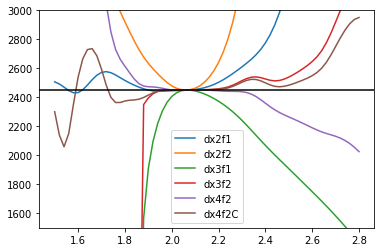

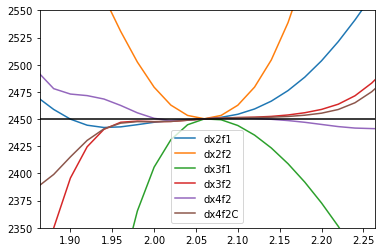

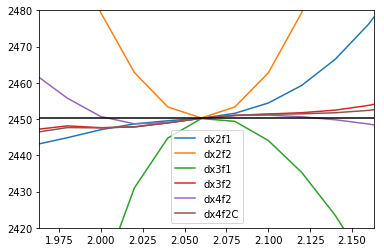

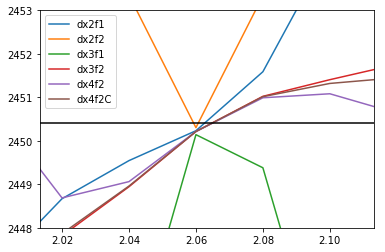

In [10]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2450.4206,color='black')
plt.ylim(1500,3000)
plt.legend()
plt.savefig('2nd_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2450.4206,color='black')
plt.xlim(2.0633-.2,2.0633+.2) #+-.2 bohr
plt.ylim(2350,2550)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2450.4206,color='black')
plt.xlim(2.0633-.1,2.0633+.1) #+-.1 bohr
plt.ylim(2420,2480)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2450.4206,color='black')
plt.xlim(2.0633-.05,2.0633+.05) #+-.05 bohr
plt.ylim(2448,2453)
plt.savefig('2nd_05fd_zoom.jpg')
plt.legend()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


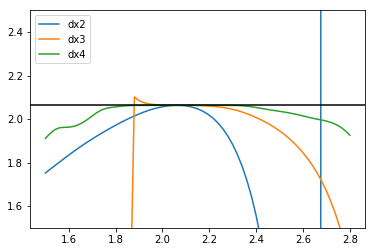

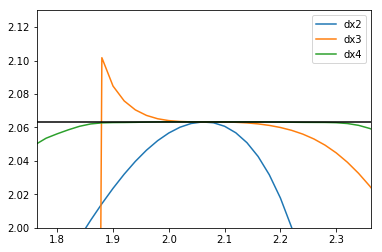

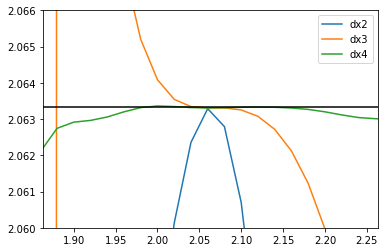

In [14]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.06332557042,color='black')
plt.ylim(1.5,2.5)
plt.legend()
plt.savefig('dist_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.06332557042,color='black')
plt.ylim(2.0,2.13)
plt.xlim(2.063-.3,2.063+.3)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.06332557042,color='black')
plt.ylim(2.06,2.066)
plt.xlim(2.063-.2,2.063+.2)
plt.legend()
plt.savefig('dist_05fd_zoom.jpg')
plt.show()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


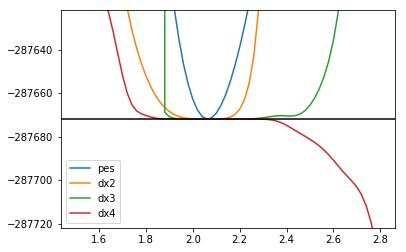

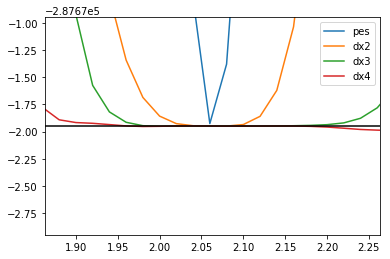

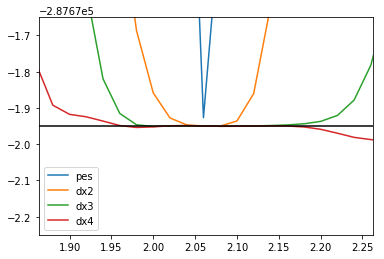

In [13]:
kjm=2625.50

plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-109.56844409500462*kjm,color='black')
plt.ylim(-109.56844409500462*kjm-50,-109.56844409500462*kjm+50)
plt.legend()
plt.savefig('en_05fd.jpg')
plt.show()

# chemical accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-109.56844409500462*kjm,color='black')
plt.ylim(-109.56844409500462*kjm-1,-109.56844409500462*kjm+1)
plt.xlim(2.063-.2,2.063+.2) 
plt.legend()
plt.show()

# .3 Kj/mol accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-109.56844409500462*kjm,color='black')
plt.ylim(-109.56844409500462*kjm-.3,-109.56844409500462*kjm+.3)
plt.xlim(2.063-.2,2.063+.2)
plt.legend()
plt.savefig('en_05fd_zoom.jpg')
plt.show()

In [23]:
%store DerivativesH05

Stored 'DerivativesH05' (list)


In [3]:
%store -r